<a href="https://colab.research.google.com/github/maximogiovanettoni/TP_modelacion_numerica/blob/main/mediciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del problema
L = 5          # Longitud de los vehículos (m)
d = 10         # Distancia entre vehículos (m)
vc = 25        # Velocidad de crucero (m/s)
n = 15         # Número de vehículos
tau = 0.9      # Retardo (s)
k = 1.25       # Factor de perturbación
t1 = 0.25      # Tiempo de mínima velocidad (s)
C = 9.3750     # Constante C
T = 60         # Tiempo total de simulación (s)
h = 0.01       # Paso de tiempo

# número de pasos de tiempo
n_steps = int(T/h)+1
t = np.linspace(0, T, n_steps)

# Perturbación del primer vehículo (velocidad)
def z0_prime(t):
    return -k * vc * t * np.exp((-t1-t)/t1)

# Posición del primer vehículo (perturbación)
def z0(t):
    return -k * vc * t1 * np.e * (t1 - np.exp(-t/t1) * (t + t1))

# Derivada de z para el vehículo i
def z_prime(i, t, z_history):
    if t <= i * tau:
        return 0

    # Obtener el índice correspondiente al tiempo t-tau
    delay_idx = int((t-tau)/h)
    if delay_idx < 0:
        return 0

    zi_delayed = z_history[i, delay_idx]
    zi_prev_delayed = z_history[i-1, delay_idx]

    argument = (zi_delayed - zi_prev_delayed)/(-L-d)
    if argument <= 0:
        return 0
    return C * np.log(argument)

# Inicializar arrays para almacenar resultados
z = np.zeros((n+1, n_steps))
v = np.zeros((n+1, n_steps))

# Condiciones iniciales
for i in range(n+1):
    z[i, 0] = -i * (L + d)

# Método de Euler
for j in range(1, n_steps):
    current_t = t[j]

    # Actualizar posición del vehículo 0 (perturbación)
    z[0, j] = z0(current_t)

    # Actualizar posiciones de los demás vehículos
    for i in range(1, n+1):
        derivative = z_prime(i, current_t, z)
        z[i, j] = z[i, j-1] + h * derivative

# Calcular velocidades
# Para el vehículo 0 (perturbación)
v[0, :] = z0_prime(t) + vc

# Para los demás vehículos
for i in range(1, n+1):
    v[i, 1:] = (z[i, 1:] - z[i, :-1])/h + vc

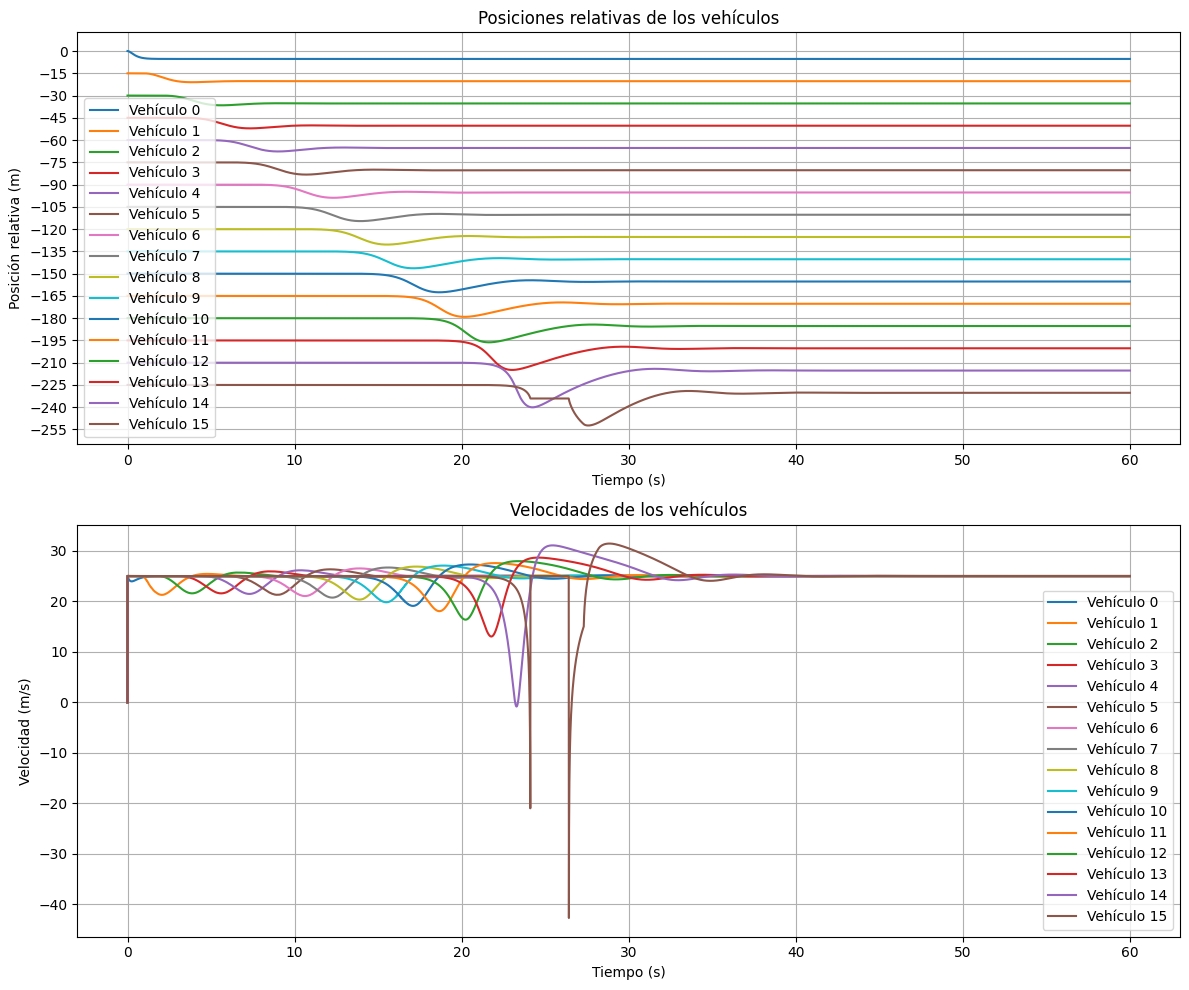

In [2]:
plt.figure(figsize=(12, 10))

# Posiciones
plt.subplot(2, 1, 1)
for i in range(n+1):
    plt.plot(t, z[i, :], label=f'Vehículo {i}')
plt.grid(True)
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición relativa (m)')
plt.title('Posiciones relativas de los vehículos')
plt.legend()
plt.yticks(range(-(n+2)*(L+d), 1, L+d))

# Velocidades
plt.subplot(2, 1, 2)
for i in range(n+1):
    plt.plot(t, v[i, :], label=f'Vehículo {i}')
plt.grid(True)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Velocidades de los vehículos')

plt.legend()

plt.tight_layout()
plt.show()

Vehículo	Velocidad Máxima (m/s)	Velocidad Mínima (m/s)
0		25.00			24.79
1		25.42			21.27
2		25.70			21.57
3		25.93			21.57
4		26.14			21.46
5		26.33			21.28
6		26.51			21.04
7		26.69			20.73
8		26.87			20.33
9		27.07			19.81
10		27.29			19.09
11		27.56			18.04
12		27.95			16.36
13		28.65			13.02
14		31.07			-0.84
15		31.43			-42.71


([<matplotlib.axis.YTick at 0x1d0e516e190>,
 [Text(0, -255, '−255'),
  Text(0, -240, '−240'),
  Text(0, -225, '−225'),
  Text(0, -210, '−210'),
  Text(0, -195, '−195'),
  Text(0, -180, '−180'),
  Text(0, -165, '−165'),
  Text(0, -150, '−150'),
  Text(0, -135, '−135'),
  Text(0, -120, '−120'),
  Text(0, -105, '−105'),
  Text(0, -90, '−90'),
  Text(0, -75, '−75'),
  Text(0, -60, '−60'),
  Text(0, -45, '−45'),
  Text(0, -30, '−30'),
  Text(0, -15, '−15'),
  Text(0, 0, '0')])

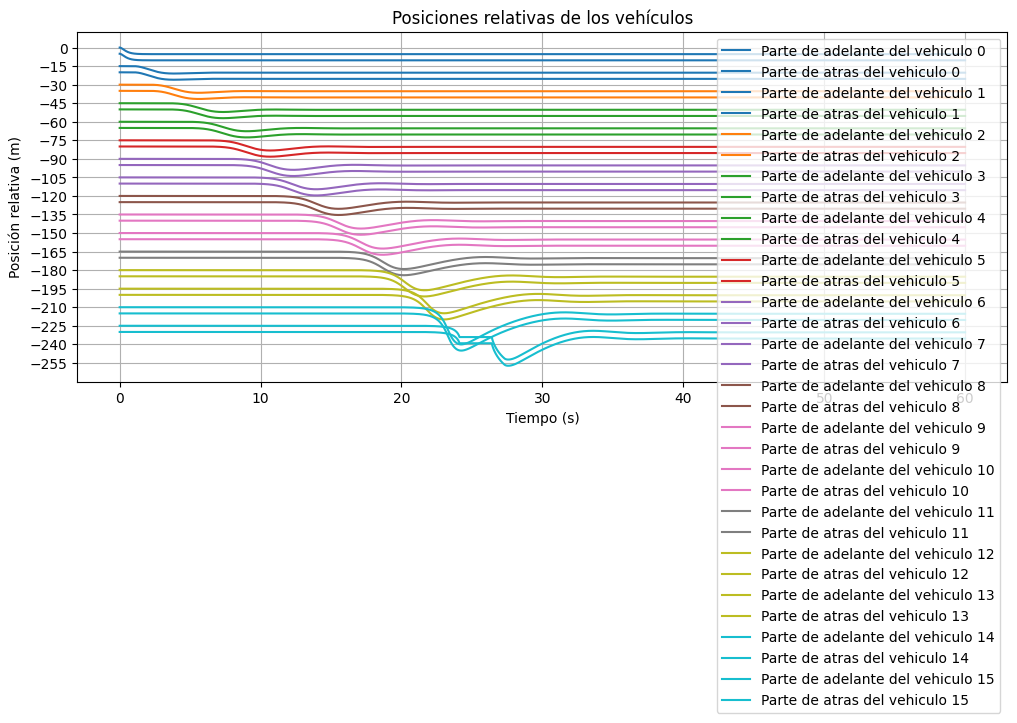

In [4]:
# Definir el índice inicial para t > 1
start_idx = int(1 / h)  # Índice donde comienza el análisis

# Calcular velocidades máxima y mínima ignorando los valores antes de t = 1
vel_max_min = [(i, np.max(v[i, start_idx:]), np.min(v[i, start_idx:])) for i in range(n+1)]

# Tabla de velocidades ajustada
print("Vehículo\tVelocidad Máxima (m/s)\tVelocidad Mínima (m/s)")
for vehicle, vmax, vmin in vel_max_min:
    print(f"{vehicle}\t\t{vmax:.2f}\t\t\t{vmin:.2f}")
    


plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
colors = plt.cm.tab10(np.linspace(0, 1, n + 1))  # Paleta de colores
for i in range(n+1):
    plt.plot(t, z[i, :], label=f'Parte de adelante del vehiculo {i}', color=colors[i])
    plt.plot(t, z[i, :] - L, label=f'Parte de atras del vehiculo {i}', color=colors[i])
plt.grid(True)
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición relativa (m)')
plt.title('Posiciones relativas de los vehículos')
plt.legend()
plt.yticks(range(-(n+2)*(L+d), 1, L+d))